# Comparing Feedforward neural network vs Basic Convolutional neural network on image data

## Dataset:
The CIFAR-10 dataset (Canadian Institute for Advanced Research, 10 classes) is a subset of the Tiny Images dataset and consists of 60000 32x32 color images. The images are labelled with one of 10 mutually exclusive classes: airplane, automobile (but not truck or pickup truck), bird, cat, deer, dog, frog, horse, ship, and truck (but not pickup truck). There are 6000 images per class with 5000 training and 1000 testing images per class.

The criteria for deciding whether an image belongs to a class were as follows:

    The class name should be high on the list of likely answers to the question “What is in this picture?”
    The image should be photo-realistic. Labelers were instructed to reject line drawings.
    The image should contain only one prominent instance of the object to which the class refers. The object may be partially occluded or seen from an unusual viewpoint as long as its identity is still clear to the labeler.

Source:
https://www.cs.toronto.edu/~kriz/cifar.html

In [184]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
import tensorflow as tf
import tensorflow.keras.layers as tfl
from tensorflow.keras.regularizers import l2
from tensorflow.keras.layers import Dense, Dropout, BatchNormalization
from tensorflow.keras.optimizers import Adam
from sklearn.model_selection import train_test_split
from tensorflow.keras.datasets import cifar10

In [185]:
(X_train_orig,Y_train_orig),(X_test_orig,Y_test_orig) = cifar10.load_data()
X_train_orig.shape, Y_train_orig.shape
X_train, X_val, Y_train, Y_val = train_test_split(X_train_orig, Y_train_orig, 
                                                  test_size=0.2, 
                                                  random_state=42, 
                                                  stratify=Y_train_orig)

In [186]:
X_train = X_train/255
X_val = X_val/255
X_test = X_test_orig/255
X_train_flatten = X_train.reshape(X_train.shape[0],32*32*3)
X_val_flatten = X_val.reshape(X_val.shape[0],32*32*3)
X_test_flatten = X_test.reshape(X_test.shape[0],32*32*3)

In [187]:
loss = 'sparse_categorical_crossentropy'
metrics=['accuracy']

## Shallow Feedforward Neural Network
Let's begin with a basic FFN with only two hidden layers and no regularization.


In [188]:
fnn_shallow = tf.keras.models.Sequential([
    tfl.Input(shape=(X_train_flatten.shape[1],)), 
    tfl.Dense(units=32, activation='relu'),
    tfl.Dense(units=10, activation='softmax')
])
optimizer = tf.keras.optimizers.Adam(learning_rate=0.0001)
fnn_shallow.compile(loss=loss, optimizer=optimizer, metrics=metrics)
fnn_shallow.summary()

Model: "sequential_28"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ dense_75 (Dense)                │ (None, 32)             │        98,336 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_76 (Dense)                │ (None, 10)             │           330 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 98,666 (385.41 KB)

 Trainable params: 98,666 (385.41 KB)

 Non-trainable params: 0 (0.00 B)

In [189]:
history = fnn_shallow.fit(X_train_flatten, Y_train, 
                  epochs=50, 
                  batch_size=64, 
                  validation_data=(X_val_flatten, Y_val),
                  callbacks=[tf.keras.callbacks.EarlyStopping(patience=5, restore_best_weights=True)])

Epoch 1/50
 91/625 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.1248 - loss: 2.3239

W0000 00:00:1720144022.050544     122 graph_launch.cc:671] Fallback to op-by-op mode because memset node breaks graph update


618/625 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.1976 - loss: 2.1850

W0000 00:00:1720144023.768181     124 graph_launch.cc:671] Fallback to op-by-op mode because memset node breaks graph update


625/625 ━━━━━━━━━━━━━━━━━━━━ 3s 3ms/step - accuracy: 0.1983 - loss: 2.1837 - val_accuracy: 0.3230 - val_loss: 1.9362
Epoch 2/50
625/625 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - accuracy: 0.3276 - loss: 1.9167 - val_accuracy: 0.3527 - val_loss: 1.8660
Epoch 3/50
625/625 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - accuracy: 0.3559 - loss: 1.8438 - val_accuracy: 0.3587 - val_loss: 1.8282
Epoch 4/50
625/625 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - accuracy: 0.3690 - loss: 1.8082 - val_accuracy: 0.3796 - val_loss: 1.8021
Epoch 5/50
625/625 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - accuracy: 0.3774 - loss: 1.7884 - val_accuracy: 0.3850 - val_loss: 1.7790
Epoch 6/50
625/625 ━━━━━━━━━━━━━━━━━━━━ 3s 2ms/step - accuracy: 0.3828 - loss: 1.7679 - val_accuracy: 0.3891 - val_loss: 1.7599
Epoch 7/50
625/625 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - accuracy: 0.3891 - loss: 1.7477 - val_accuracy: 0.3970 - val_loss: 1.7456
Epoch 8/50
625/625 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - accuracy: 0.3942 - loss: 1.7280 - val_accuracy: 0.3951 - val_

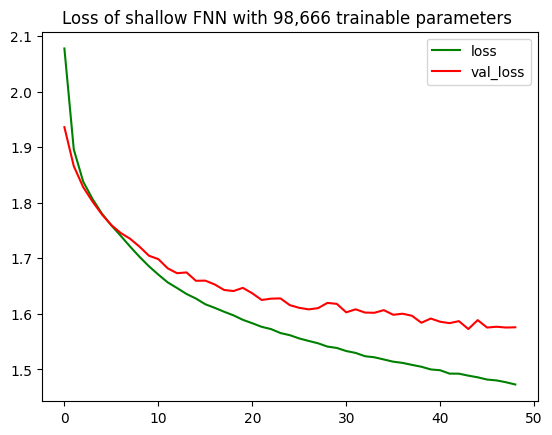

In [190]:
plt.plot(history.history['loss'],color='green')
plt.plot(history.history['val_loss'],color='red')
plt.title(f'Loss of shallow FNN with 98,666 trainable parameters ')
plt.legend(labels=['loss','val_loss'])

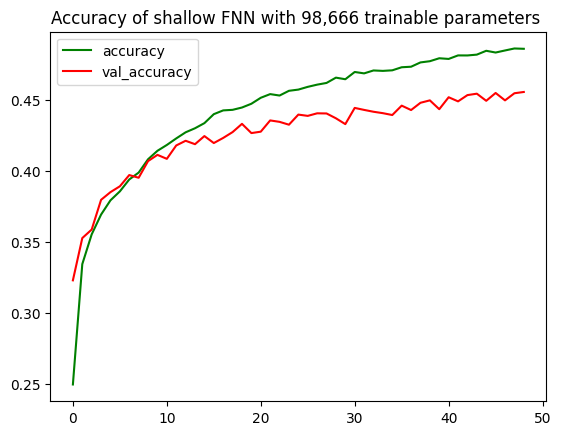

In [191]:
plt.plot(history.history['accuracy'],color='green')
plt.plot(history.history['val_accuracy'],color='red')
plt.title(f'Accuracy of shallow FNN with 98,666 trainable parameters ')
plt.legend(labels=['accuracy','val_accuracy'])

In [210]:
fnn_shallow_test_loss, fnn_shallow_test_accuracy = fnn_shallow.evaluate(X_test_flatten, Y_test_orig)
print(f"Test Accuracy: {fnn_shallow_test_accuracy*100:.3f}%")
print(f"Test Loss: {fnn_shallow_test_loss}")

313/313 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - accuracy: 0.4529 - loss: 1.5683
Test Accuracy: 45.350%
Test Loss: 1.5632991790771484


Pretty low accuracy on test set with 45.350%

## Deep Feedforward Neural Network + Regularization
Now lets build a deeper model and add regularization (Ridge regularization (L2), Batch Normalization and Dropout)


In [193]:
fnn_deep = tf.keras.models.Sequential([
    tfl.Input(shape=(X_train_flatten.shape[1],)),
    Dense(512, activation='relu', kernel_regularizer=l2(0.0001)),
    BatchNormalization(),
    Dropout(0.3),
    Dense(256, activation='relu', kernel_regularizer=l2(0.0001)),
    BatchNormalization(),
    Dropout(0.3),
    Dense(128, activation='relu', kernel_regularizer=l2(0.0001)),
    BatchNormalization(),
    Dropout(0.3),
    Dense(64, activation='relu', kernel_regularizer=l2(0.0001)),
    BatchNormalization(),
    Dropout(0.3),
    Dense(10, activation='softmax')
])
optimizer = tf.keras.optimizers.Adam(learning_rate=0.0001)
fnn_deep.compile(loss=loss, optimizer=optimizer, metrics=metrics)
fnn_deep.summary()

Model: "sequential_29"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ dense_77 (Dense)                │ (None, 512)            │     1,573,376 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ batch_normalization_113         │ (None, 512)            │         2,048 │
│ (BatchNormalization)            │                        │               │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_74 (Dropout)            │ (None, 512)            │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_78 (Dense)                │ (None, 256)            │       131,328 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ batch_normalization_114         │ (None, 256)            │         1,024 │
│ (BatchNormalization)            │                        │               │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_75 (Dropout)            │ (None, 256)            │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_79 (Dense)                │ (None, 128)            │        32,896 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ batch_normalization_115         │ (None, 128)            │           512 │
│ (BatchNormalization)            │                        │               │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_76 (Dropout)            │ (None, 128)            │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_80 (Dense)                │ (None, 64)             │         8,256 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ batch_normalization_116         │ (None, 64)             │           256 │
│ (BatchNormalization)            │                        │               │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_77 (Dropout)            │ (None, 64)             │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_81 (Dense)                │ (None, 10)             │           650 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 1,750,346 (6.68 MB)

 Trainable params: 1,748,426 (6.67 MB)

 Non-trainable params: 1,920 (7.50 KB)

In [194]:
history = fnn_deep.fit(X_train_flatten, Y_train, 
                  epochs=50, 
                  batch_size=64, 
                  validation_data=(X_val_flatten, Y_val),
                  callbacks=[tf.keras.callbacks.EarlyStopping(patience=5, restore_best_weights=True)])

Epoch 1/50
 48/625 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step - accuracy: 0.1258 - loss: 3.1480

W0000 00:00:1720144101.808966     123 graph_launch.cc:671] Fallback to op-by-op mode because memset node breaks graph update


619/625 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 0.1752 - loss: 2.8175

W0000 00:00:1720144104.672628     123 graph_launch.cc:671] Fallback to op-by-op mode because memset node breaks graph update


625/625 ━━━━━━━━━━━━━━━━━━━━ 12s 6ms/step - accuracy: 0.1756 - loss: 2.8153 - val_accuracy: 0.3370 - val_loss: 2.0279
Epoch 2/50
 33/625 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step - accuracy: 0.2354 - loss: 2.4146

W0000 00:00:1720144105.279316     123 graph_launch.cc:671] Fallback to op-by-op mode because memset node breaks graph update


625/625 ━━━━━━━━━━━━━━━━━━━━ 2s 4ms/step - accuracy: 0.2621 - loss: 2.3372 - val_accuracy: 0.3617 - val_loss: 1.9374
Epoch 3/50
625/625 ━━━━━━━━━━━━━━━━━━━━ 2s 4ms/step - accuracy: 0.3016 - loss: 2.1753 - val_accuracy: 0.3866 - val_loss: 1.8871
Epoch 4/50
625/625 ━━━━━━━━━━━━━━━━━━━━ 2s 3ms/step - accuracy: 0.3155 - loss: 2.0905 - val_accuracy: 0.3832 - val_loss: 1.8667
Epoch 5/50
625/625 ━━━━━━━━━━━━━━━━━━━━ 2s 3ms/step - accuracy: 0.3277 - loss: 2.0419 - val_accuracy: 0.4049 - val_loss: 1.8164
Epoch 6/50
625/625 ━━━━━━━━━━━━━━━━━━━━ 2s 4ms/step - accuracy: 0.3449 - loss: 1.9919 - val_accuracy: 0.3485 - val_loss: 2.0583
Epoch 7/50
625/625 ━━━━━━━━━━━━━━━━━━━━ 2s 3ms/step - accuracy: 0.3487 - loss: 1.9583 - val_accuracy: 0.4155 - val_loss: 1.7909
Epoch 8/50
625/625 ━━━━━━━━━━━━━━━━━━━━ 2s 3ms/step - accuracy: 0.3677 - loss: 1.9187 - val_accuracy: 0.4230 - val_loss: 1.7712
Epoch 9/50
625/625 ━━━━━━━━━━━━━━━━━━━━ 2s 4ms/step - accuracy: 0.3727 - loss: 1.8914 - val_accuracy: 0.4228 - val_

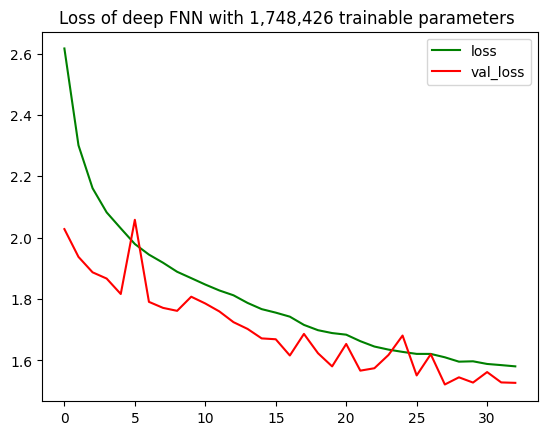

In [195]:
plt.plot(history.history['loss'],color='green')
plt.plot(history.history['val_loss'],color='red')
plt.title(f'Loss of deep FNN with 1,748,426 trainable parameters ')
plt.legend(labels=['loss','val_loss'])

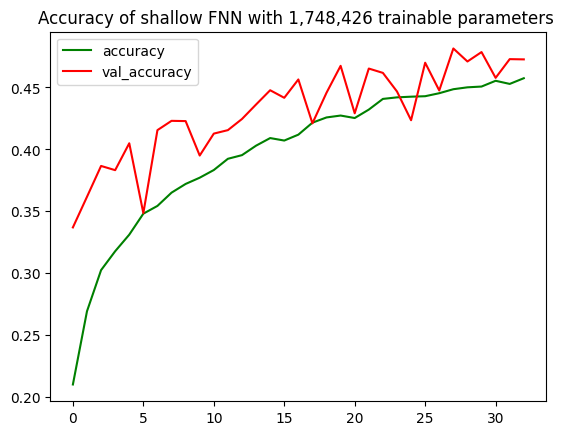

In [196]:
plt.plot(history.history['accuracy'],color='green')
plt.plot(history.history['val_accuracy'],color='red')
plt.title(f'Accuracy of shallow FNN with 1,748,426 trainable parameters ')
plt.legend(labels=['accuracy','val_accuracy'])

In [211]:
fnn_deep_test_loss, fnn_deep_test_accuracy = ffn_deep.evaluate(X_test_flatten, Y_test_orig)
print(f"Test Accuracy: {fnn_deep_test_accuracy*100:.3f}%")
print(f"Test Loss: {fnn_deep_test_loss}")

313/313 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - accuracy: 0.5033 - loss: 1.4398
Test Accuracy: 49.890%
Test Loss: 1.450695276260376


It isn't much effective either, with almost 18 times the number of trainable parameters only achieved +4.54% improved accuracy on test set.

## Convolutional Neural Network + Regularization
Finally lets build a deep CNN using regularization (Batch Normalization, Dropout) but with only 551,722 trainable parameters

In [198]:
cnn = tf.keras.models.Sequential([
    tf.keras.layers.Conv2D(32, (3, 3), activation='relu', padding='same', input_shape=(32, 32, 3)),
    tf.keras.layers.BatchNormalization(),
    tf.keras.layers.Conv2D(32, (3, 3), activation='relu', padding='same'),
    tf.keras.layers.BatchNormalization(),
    tf.keras.layers.MaxPooling2D((2, 2)),
    tf.keras.layers.Dropout(0.2),
    
    tf.keras.layers.Conv2D(64, (3, 3), activation='relu', padding='same'),
    tf.keras.layers.BatchNormalization(),
    tf.keras.layers.Conv2D(64, (3, 3), activation='relu', padding='same'),
    tf.keras.layers.BatchNormalization(),
    tf.keras.layers.MaxPooling2D((2, 2)),
    tf.keras.layers.Dropout(0.3),
    
    tf.keras.layers.Conv2D(128, (3, 3), activation='relu', padding='same'),
    tf.keras.layers.BatchNormalization(),
    tf.keras.layers.Conv2D(128, (3, 3), activation='relu', padding='same'),
    tf.keras.layers.MaxPooling2D((2, 2)),
    
    tf.keras.layers.Flatten(),
    tf.keras.layers.Dense(128, activation='relu'),
    tf.keras.layers.BatchNormalization(),
    tf.keras.layers.Dense(10, activation='softmax')
])

optimizer = tf.keras.optimizers.Adam(learning_rate=0.0001)
cnn.compile(optimizer=optimizer,
            loss=loss,
            metrics=metrics)

cnn.summary()

/opt/conda/lib/python3.10/site-packages/keras/src/layers/convolutional/base_conv.py:107: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


Model: "sequential_30"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ conv2d_77 (Conv2D)              │ (None, 32, 32, 32)     │           896 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ batch_normalization_117         │ (None, 32, 32, 32)     │           128 │
│ (BatchNormalization)            │                        │               │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_78 (Conv2D)              │ (None, 32, 32, 32)     │         9,248 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ batch_normalization_118         │ (None, 32, 32, 32)     │           128 │
│ (BatchNormalization)            │                        │               │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_41 (MaxPooling2D) │ (None, 16, 16, 32)     │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_78 (Dropout)            │ (None, 16, 16, 32)     │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_79 (Conv2D)              │ (None, 16, 16, 64)     │        18,496 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ batch_normalization_119         │ (None, 16, 16, 64)     │           256 │
│ (BatchNormalization)            │                        │               │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_80 (Conv2D)              │ (None, 16, 16, 64)     │        36,928 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ batch_normalization_120         │ (None, 16, 16, 64)     │           256 │
│ (BatchNormalization)            │                        │               │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_42 (MaxPooling2D) │ (None, 8, 8, 64)       │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_79 (Dropout)            │ (None, 8, 8, 64)       │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_81 (Conv2D)              │ (None, 8, 8, 128)      │        73,856 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ batch_normalization_121         │ (None, 8, 8, 128)      │           512 │
│ (BatchNormalization)            │                        │               │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_82 (Conv2D)              │ (None, 8, 8, 128)      │       147,584 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_43 (MaxPooling2D) │ (None, 4, 4, 128)      │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ flatten_15 (Flatten)            │ (None, 2048)           │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_82 (Dense)                │ (None, 128)            │       262,272 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ batch_normalization_122         │ (None, 128)            │           512 │
│ (BatchNormalization)            │                        │               │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_83 (Dense)                │ (None, 10)             │         1,290 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 552,362 (2.11 MB)

 Trainable params: 551,466 (2.10 MB)

 Non-trainable params: 896 (3.50 KB)

In [199]:
history = cnn.fit(X_train, Y_train, 
                  epochs=50, 
                  batch_size=64, 
                  validation_data=(X_val, Y_val),
                  callbacks=[tf.keras.callbacks.EarlyStopping(patience=5, restore_best_weights=True)])

Epoch 1/50
 16/625 ━━━━━━━━━━━━━━━━━━━━ 6s 11ms/step - accuracy: 0.1056 - loss: 2.8160 

W0000 00:00:1720144186.941236     122 graph_launch.cc:671] Fallback to op-by-op mode because memset node breaks graph update


622/625 ━━━━━━━━━━━━━━━━━━━━ 0s 7ms/step - accuracy: 0.3096 - loss: 2.0198

W0000 00:00:1720144192.485367     124 graph_launch.cc:671] Fallback to op-by-op mode because memset node breaks graph update


625/625 ━━━━━━━━━━━━━━━━━━━━ 14s 10ms/step - accuracy: 0.3101 - loss: 2.0180 - val_accuracy: 0.4005 - val_loss: 1.6250
Epoch 2/50
 17/625 ━━━━━━━━━━━━━━━━━━━━ 4s 7ms/step - accuracy: 0.5002 - loss: 1.4433

W0000 00:00:1720144193.259650     124 graph_launch.cc:671] Fallback to op-by-op mode because memset node breaks graph update


625/625 ━━━━━━━━━━━━━━━━━━━━ 5s 8ms/step - accuracy: 0.5093 - loss: 1.3799 - val_accuracy: 0.5445 - val_loss: 1.2721
Epoch 3/50
625/625 ━━━━━━━━━━━━━━━━━━━━ 5s 8ms/step - accuracy: 0.5828 - loss: 1.1782 - val_accuracy: 0.5894 - val_loss: 1.1626
Epoch 4/50
625/625 ━━━━━━━━━━━━━━━━━━━━ 5s 8ms/step - accuracy: 0.6254 - loss: 1.0584 - val_accuracy: 0.6128 - val_loss: 1.0836
Epoch 5/50
625/625 ━━━━━━━━━━━━━━━━━━━━ 5s 8ms/step - accuracy: 0.6612 - loss: 0.9621 - val_accuracy: 0.6355 - val_loss: 1.0481
Epoch 6/50
625/625 ━━━━━━━━━━━━━━━━━━━━ 5s 8ms/step - accuracy: 0.6863 - loss: 0.8913 - val_accuracy: 0.6735 - val_loss: 0.9535
Epoch 7/50
625/625 ━━━━━━━━━━━━━━━━━━━━ 5s 8ms/step - accuracy: 0.7128 - loss: 0.8259 - val_accuracy: 0.6834 - val_loss: 0.9077
Epoch 8/50
625/625 ━━━━━━━━━━━━━━━━━━━━ 5s 8ms/step - accuracy: 0.7319 - loss: 0.7641 - val_accuracy: 0.7148 - val_loss: 0.8130
Epoch 9/50
625/625 ━━━━━━━━━━━━━━━━━━━━ 5s 8ms/step - accuracy: 0.7501 - loss: 0.7151 - val_accuracy: 0.7040 - val_

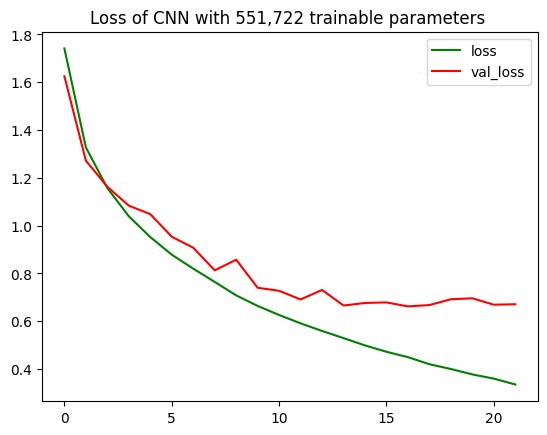

In [206]:
plt.plot(history.history['loss'],color='green')
plt.plot(history.history['val_loss'],color='red')
plt.title(f'Loss of CNN with 551,722 trainable parameters ')
plt.legend(labels=['loss','val_loss'])

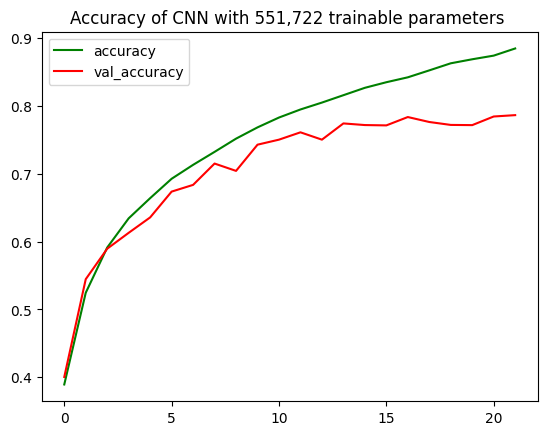

In [207]:
plt.plot(history.history['accuracy'],color='green')
plt.plot(history.history['val_accuracy'],color='red')
plt.title(f'Accuracy of CNN with 551,722 trainable parameters ')
plt.legend(labels=['accuracy','val_accuracy'])

In [208]:
cnn_test_loss, cnn_test_accuracy = cnn.evaluate(X_test, Y_test_orig)
print(f"Test Accuracy: {cnn_test_accuracy*100:.3f}%")
print(f"Test Loss: {cnn_test_loss}")

313/313 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - accuracy: 0.7798 - loss: 0.6744
Test Accuracy: 77.880%
Test Loss: 0.6712026000022888


CNN achieved a much better performance  with 77.880% accuracy on test set (27.99% with respect to deep FNN)

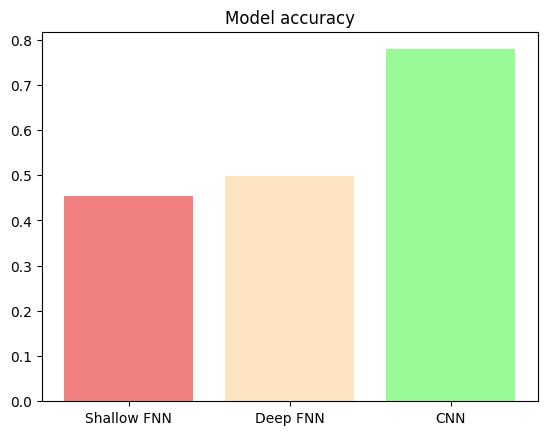

In [212]:
models = ['Shallow FNN','Deep FNN','CNN']
acc_scores = [fnn_shallow_test_accuracy,fnn_deep_test_accuracy,cnn_test_accuracy]
plt.bar(models,acc_scores,color=['lightcoral','bisque','palegreen'])
plt.title('Model accuracy')
plt.show()